# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import plotly.express as px

In [36]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
stars = []
country = []
recommended = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
 
    for para in parsed_content.find_all("div", {"class": "rating-10"}):            
        try:
            stars.append(para.span.text)  
            
        except:
            print(f"Error on page {i}")
            stars.append("None")
    
    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.text.strip(" ()"))

    for para in parsed_content.find_all("td", {"class": "review-value rating-yes"}): 
        recommended.append(para.get_text())
    
    for para in parsed_content.find_all("td", {"class": "review-value rating-no"}): 
        recommended.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(stars)} total stars")
    print(f"   ---> {len(country)} total country")
    print(f"   ---> {len(recommended)} total recommended")


Scraping page 1
   ---> 100 total reviews
   ---> 101 total stars
   ---> 100 total country
   ---> 100 total recommended
Scraping page 2
   ---> 200 total reviews
   ---> 202 total stars
   ---> 200 total country
   ---> 200 total recommended
Scraping page 3
   ---> 300 total reviews
   ---> 303 total stars
   ---> 300 total country
   ---> 300 total recommended
Scraping page 4
   ---> 400 total reviews
   ---> 404 total stars
   ---> 400 total country
   ---> 400 total recommended
Scraping page 5
   ---> 500 total reviews
   ---> 505 total stars
   ---> 500 total country
   ---> 500 total recommended
Scraping page 6
   ---> 600 total reviews
   ---> 606 total stars
   ---> 600 total country
   ---> 600 total recommended
Scraping page 7
   ---> 700 total reviews
   ---> 707 total stars
   ---> 700 total country
   ---> 700 total recommended
Scraping page 8
   ---> 800 total reviews
   ---> 808 total stars
   ---> 800 total country
   ---> 800 total recommended
Scraping page 9
   ---> 

In [37]:
df = pd.DataFrame()
# df["reviews"] = reviews
# df["stars"] = stars
# df["country"] = country
df["recommended"] = recommended
df.head(10)

,recommended
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


In [33]:
df.shape

(367, 1)

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
from sys import displayhook


def get_all_cols(df):
    all_col = list(df.columns)
    return all_col

def get_cat_cols(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

def get_head(df, n=5):
  print(f'Shape : {df.shape}')
  displayhook(df.head(n=n))

def check_missing(df, percentage=0):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>percentage]

In [ ]:
df = pd.read_csv('data/BA_reviews.csv')
get_head(df)

Shape : (1000, 2)


,Unnamed: 0,reviews
0,0,✅ Trip Verified | I virtually gave up on Brit...
1,1,✅ Trip Verified | I was pleasantly surprised ...
2,2,"✅ Trip Verified | British Airways is late, th..."
3,3,✅ Trip Verified | Flew from Amman to London on...
4,4,✅ Trip Verified | This is the worst experience...


In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
get_head(df)

Shape : (1000, 3)


,Unnamed: 0,reviews,verified
0,0,✅ Trip Verified | I virtually gave up on Brit...,True
1,1,✅ Trip Verified | I was pleasantly surprised ...,True
2,2,"✅ Trip Verified | British Airways is late, th...",True
3,3,✅ Trip Verified | Flew from Amman to London on...,True
4,4,✅ Trip Verified | This is the worst experience...,True


In [ ]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")
reviews_data

0      I virtually gave up on British Airways about t...
1      I was pleasantly surprised that the airline co...
2      British Airways is late, their website is atro...
3      Flew from Amman to London on Nov. 14 2022. Not...
4      his is the worst experience I have ever had wi...
                             ...                        
995    wo regular an uneventful flights. Curiously en...
996    London to Belfast. Another regular flight by B...
997    y full flight on G-BNLP/B747 flying from Miami...
998    Warsaw to London. WAW is not a pleasant airpor...
999    I booked my flight with Cathay Pacific,  the r...
Name: reviews, Length: 1000, dtype: object

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
text =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in stopwords.words('english')]
    rev = " ".join(rev)
    text.append(rev)

In [ ]:
df['text'] = text

In [ ]:
get_head(df)

Shape : (1000, 4)


,Unnamed: 0,reviews,verified,text
0,0,✅ Trip Verified | I virtually gave up on Brit...,True,virtually gave british airway three year ago w...
1,1,✅ Trip Verified | I was pleasantly surprised ...,True,pleasantly surprised airline could maintain st...
2,2,"✅ Trip Verified | British Airways is late, th...",True,british airway late website atrocious let chec...
3,3,✅ Trip Verified | Flew from Amman to London on...,True,flew amman london nov sure type aircraft ticke...
4,4,✅ Trip Verified | This is the worst experience...,True,worst experience ever airline flew british air...


In [ ]:
check_missing(df)

,percentage,frequency,var_type


In [ ]:
# df.to_csv("data/BA-reviews-clean.csv")

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

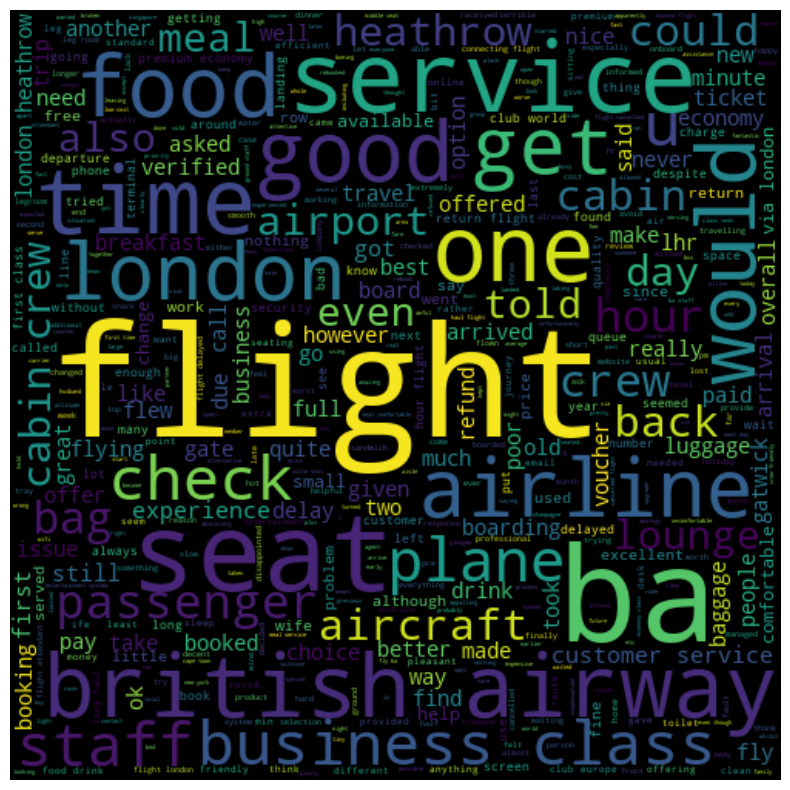

In [ ]:
# Start with one review:
reviews = " ".join(df.text)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

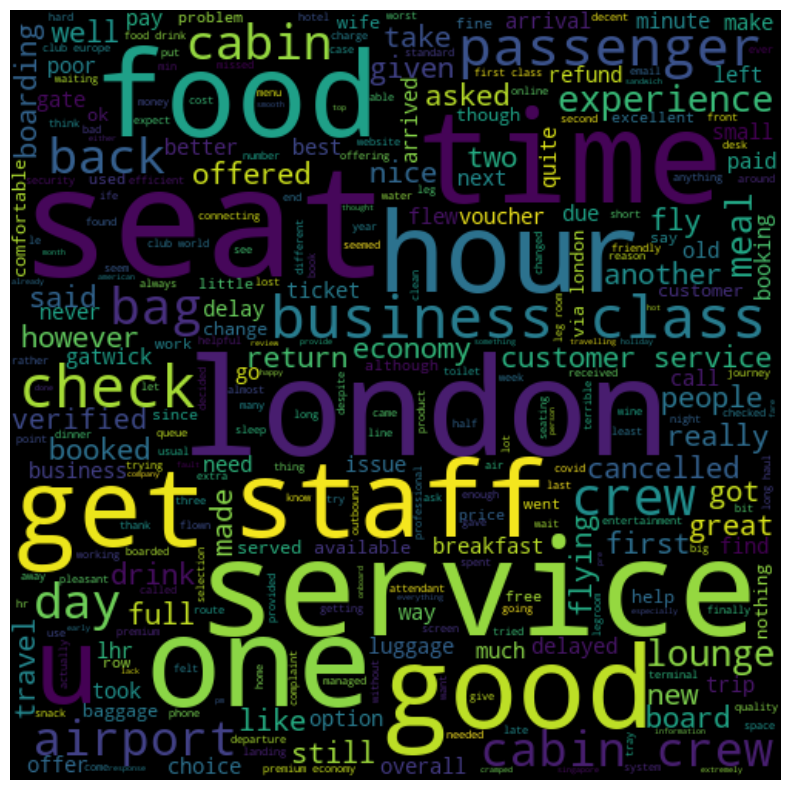

In [ ]:
reviews = " ".join(df.text)
plt.figure(figsize=(20,10))

# stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'hour'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'good'),
  Text(8, 0, 'class'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'check'),
  Text(12, 0, 'customer'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'day'),
  Text(15, 0, 'economy'),
  Text(16, 0, 'bag'),
  Text(17, 0, 'boarding'),
  Text(18, 0, 'meal'),
  Text(19, 0, 'experience')])

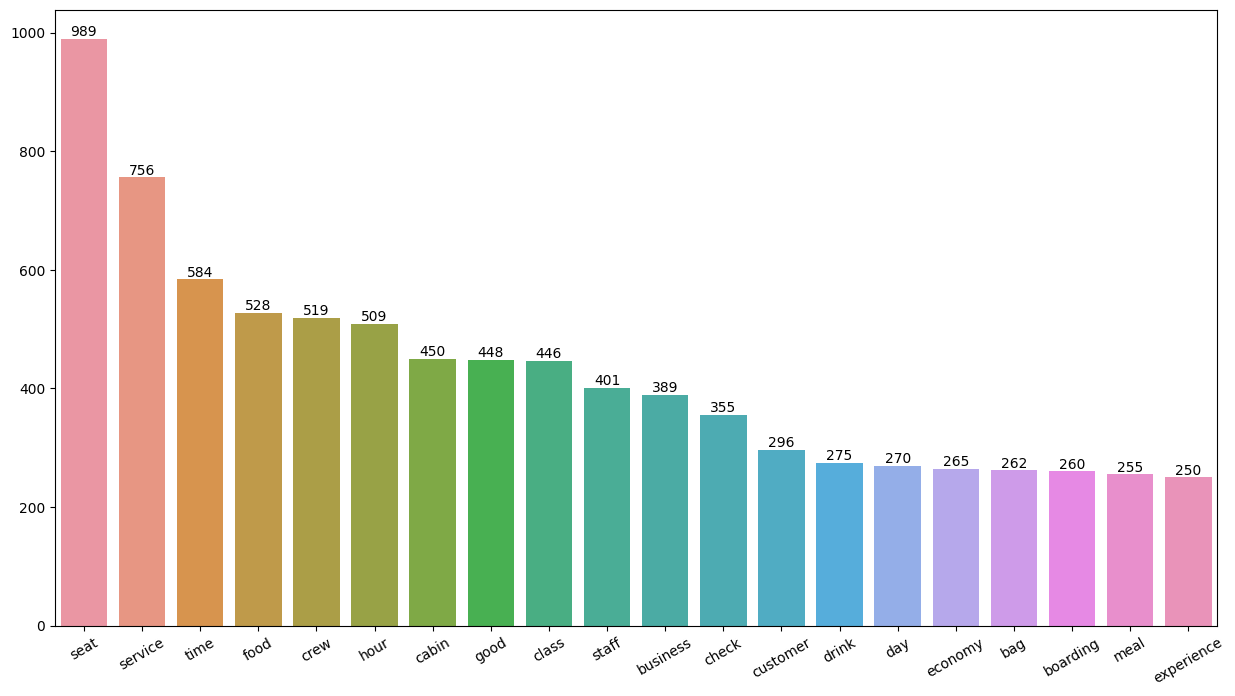

In [ ]:
import seaborn as sns
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot: >

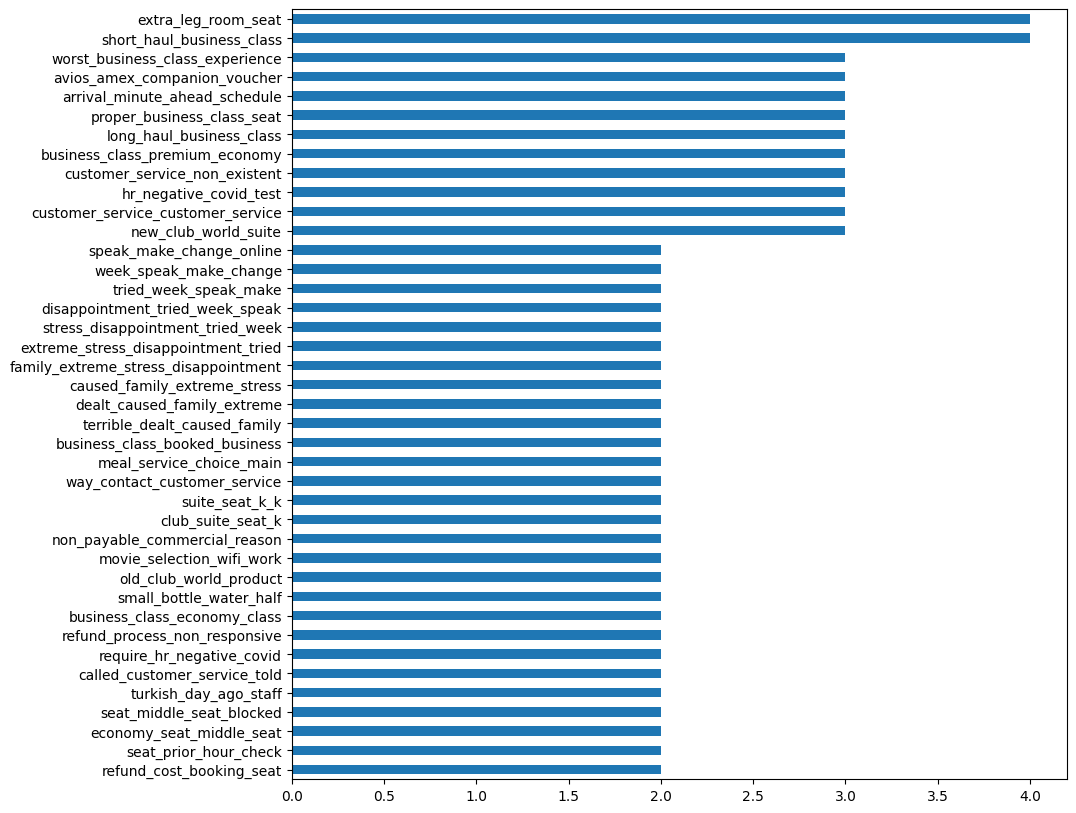

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.text)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)